In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [62]:
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
df = df.drop(["time", "Unnamed: 0"], axis = 1)

In [63]:
#Features of our dataset
X = df[df.columns[1:]]

#Features with PCA k=0.999 (PC1 - PC48)
X = df[df.columns[55:103]]

# Output to predict
y = df["pedestrians count"]
type(X)
X.shape

(15358, 48)

In [64]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [65]:
from sklearn.preprocessing import StandardScaler

# Scale the inputs to standardize the values
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [73]:
#####################################################################
# compiling the neural network model
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(25, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

In [67]:
# #compiling the neural network model
# model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
#   tf.keras.layers.Dense(250, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(150, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(1)
# ])

In [74]:
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               4900      
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 30)                1530      
                                                                 
 dense_27 (Dense)            (None, 25)                775       
                                                                 
 dense_28 (Dense)            (None, 10)                260       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,526
Trainable params: 12,526
Non-trai

In [75]:

# # compiling the model
# model.compile(loss=tf.keras.losses.mae,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['mae'])

# # Training the model
# model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=50, validation_split=0.2)

# compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

# Training the model
model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=50, validation_split=0.2)

Epoch 1/50


2022-11-22 18:48:03.031537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1850.4060 - mae: 1850.4060

2022-11-22 18:48:05.776774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 3s 10ms/step - loss: 1850.4060 - mae: 1850.4060 - val_loss: 870.6325 - val_mae: 870.6325
Epoch 2/50
269/269 [==============================] - 3s 9ms/step - loss: 776.2100 - mae: 776.2100 - val_loss: 630.7953 - val_mae: 630.7953
Epoch 3/50
269/269 [==============================] - 2s 9ms/step - loss: 614.3947 - mae: 614.3947 - val_loss: 534.7680 - val_mae: 534.7680
Epoch 4/50
269/269 [==============================] - 2s 9ms/step - loss: 526.0940 - mae: 526.0940 - val_loss: 466.7477 - val_mae: 466.7477
Epoch 5/50
269/269 [==============================] - 2s 9ms/step - loss: 458.1984 - mae: 458.1984 - val_loss: 426.3759 - val_mae: 426.3759
Epoch 6/50
269/269 [==============================] - 3s 11ms/step - loss: 417.5432 - mae: 417.5432 - val_loss: 409.9902 - val_mae: 409.9902
Epoch 7/50
269/269 [==============================] - 3s 9ms/step - loss: 391.6965 - mae: 391.6965 - val_loss: 395.1771 - val_mae: 395.1771
Epoch 8/50
269/269 [=======

In [76]:

ypred = model.predict(Xtest)

 32/144 [=====>........................] - ETA: 0s

2022-11-22 18:51:49.555180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 3ms/step


In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
#print('R score is :', r2_score(ytest, ypred))

#Old Evaluation
pred_train = model.predict(Xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train)))

ypred = model.predict(Xtest)
print(f"MSE: {np.sqrt(mean_squared_error(ytest,ypred))}")
print('R score is :', r2_score(ytest, ypred))
#print(f"MAE (mean??): {np.mean(tf.keras.metrics.mean_absolute_error(ytest, ypred))}")
# print(f"MAE (mean??): {np.mean(np.abs(ypred - ytest))}")
print(f"MAE: {np.sqrt(mean_absolute_error(ytest,ypred))}")
print(f"Overview: {ytest.describe()}")

 37/336 [==>...........................] - ETA: 0s

2022-11-22 18:51:52.689837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


336/336 [==============================] - 1s 3ms/step
735.3735079233966
144/144 [==============================] - 0s 2ms/step
MSE: 700.4361564329561
R score is : 0.9538706058161218
MAE: 17.87042833416139
Overview: count     4608.000000
mean      2591.601780
std       3261.570796
min          0.000000
25%        138.000000
50%        943.500000
75%       4776.000000
max      18153.000000
Name: pedestrians count, dtype: float64


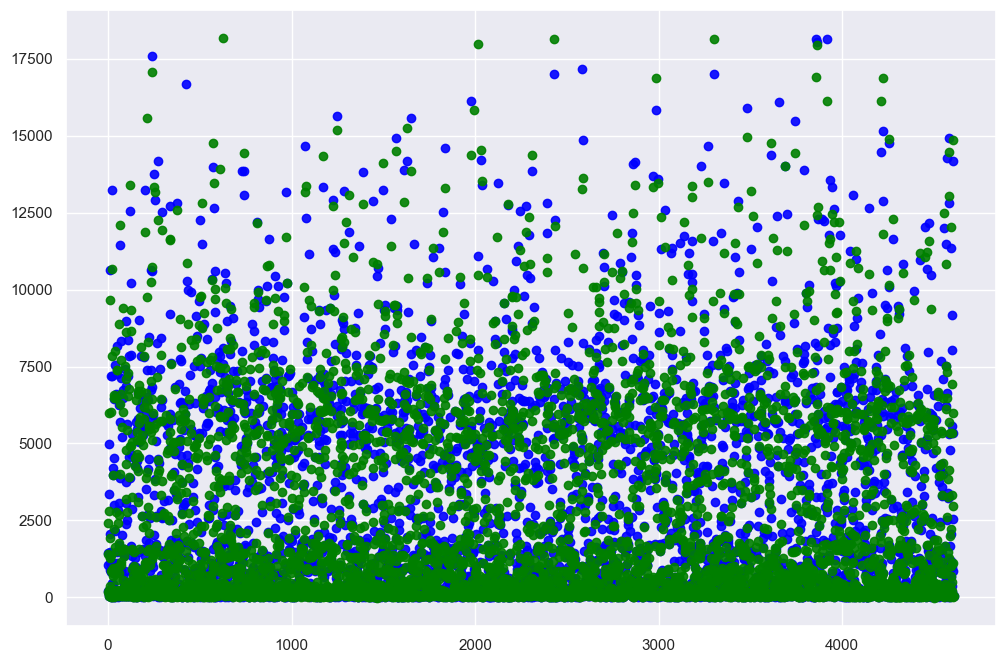

In [59]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

# ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='blue', alpha=0.9)

plt.scatter(xs, ypred, color ='green', alpha=0.9)

plt.show()